In [1]:
import pandas as pd
import numpy as np

In [2]:
shuffled = pd.read_csv("../rosmap_balanced_shuffled_8yrs.csv")
print( shuffled.head() )

   Unnamed: 0  Non-cancer illness code, self-reported: type 2 diabetes  \
0           0                                           1.011165         
1           1                                          -0.776343         
2           2                                          -0.814657         
3           3                                          -0.764805         
4           4                                           0.599249         

   Ever had known person concerned about, or recommend reduction of, alcohol consumption: No  \
0                                          -0.285235                                           
1                                           0.283466                                           
2                                           0.885290                                           
3                                           0.596894                                           
4                                           0.169029                       

In [3]:
cols_to_take = ['Alzheimer\'s disease', 'output']
shuffled = shuffled[cols_to_take]
print( shuffled.head() )

   Alzheimer's disease  output
0             0.914950     0.0
1            -0.500243     1.0
2            -0.452429     1.0
3             0.941689     1.0
4             0.701310     0.0


In [8]:
positive_samples = list(shuffled[shuffled['output'] == 1]['Alzheimer\'s disease'])
negative_samples =list( shuffled[shuffled['output'] == 0]['Alzheimer\'s disease'])

# print(positive_samples)


Positive samples mean PRS : 0.02351163678435744 standard deviation 1.0194698002882316


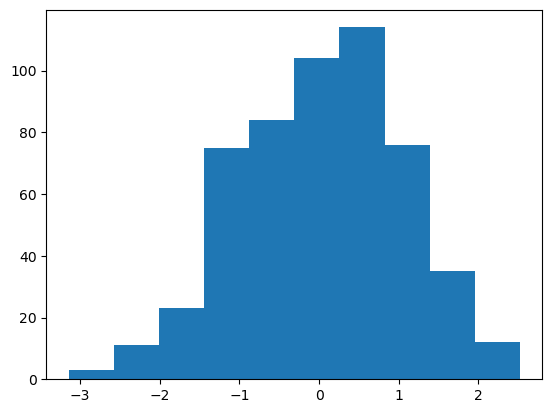

Negative samples mean PRS : 0.012306919095090815 standard deviation 1.006582283607248


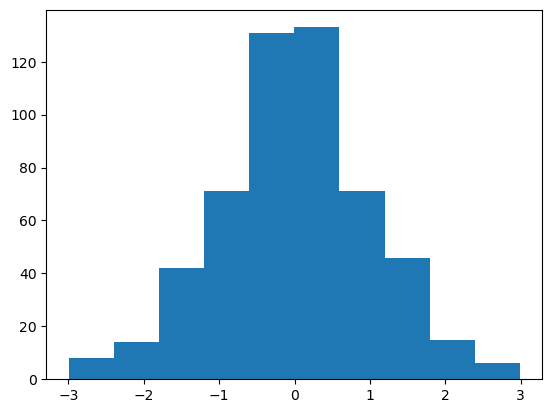

In [9]:
import matplotlib.pyplot as plt
print("Positive samples mean PRS :",np.mean(positive_samples),"standard deviation",np.std(positive_samples))
plt.hist(positive_samples,10)
plt.show()
plt.hist(negative_samples,10)
print("Negative samples mean PRS :",np.mean(negative_samples),"standard deviation",np.std(negative_samples))

<AxesSubplot:ylabel='Density'>

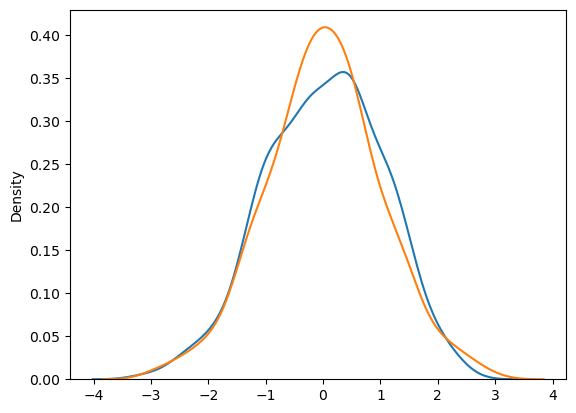

In [11]:
# sns plot
import seaborn as sns
sns.kdeplot(positive_samples)
sns.kdeplot(negative_samples)

In [4]:
mean = shuffled['Alzheimer\'s disease'].mean()
median = shuffled['Alzheimer\'s disease'].median()

print( mean, median)

0.017909277939724126 0.034319220110774


In [5]:
mode = 'mean'

In [6]:
if mode == 'mean':
    shuffled['Alzheimer\'s disease'] = np.where( shuffled['Alzheimer\'s disease'] >= mean, 1, 0)
elif mode == 'median':
    shuffled['Alzheimer\'s disease'] = np.where( shuffled['Alzheimer\'s disease'] >= median, 1, 0)
    
print( shuffled.head() )

   Alzheimer's disease  output
0                    1     0.0
1                    0     1.0
2                    0     1.0
3                    1     1.0
4                    1     0.0


In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

true_labels = shuffled['output']
predicted_labels = shuffled['Alzheimer\'s disease']

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Calculate AUROC
auroc = roc_auc_score(true_labels, predicted_labels)

# Calculate AUPRC
auprc = average_precision_score(true_labels, predicted_labels)

fscore = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", fscore)
print("AUROC:", auroc)
print("AUPRC:", auprc)


Accuracy: 0.5074487895716946
Precision: 0.507380073800738
Recall: 0.5121042830540037
F1-score: 0.509731232622799
AUROC: 0.5074487895716946
AUPRC: 0.5037793674026125


In [8]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print( conf_matrix )

[[270 267]
 [262 275]]


In [9]:
# def get_prs_values(GWAS_ID):
#     prsice_output = f'../PRSice_output_ROSMAP/{GWAS_ID}/'
#     prs_array = pd.read_csv(prsice_output+f'{GWAS_ID}.best', ' ')['PRS'].to_numpy() 
#     return prs_array

In [10]:
# # PRS_feature_matrix_only_ad = np.zeros([1, 1816])
# PRS_feature_matrix_only_ad = get_prs_values(GWAS_ID='ieu-b-5067')
# # PRS_feature_matrix_only_ad = PRS_feature_matrix_only_ad.reshape(1,-1)
# np.save('PRS_feature_matrix_only_ad', PRS_feature_matrix_only_ad)

In [11]:
# import numpy as np
# import pandas as pd
# import json

# PRS_orig_feature_matrix = np.load('./PRS_feature_matrix_only_ad.npy').astype(np.float32)
# usable_samples_ROSMAP = json.load(open('../usable_samples_ROSMAP.json'))
# final_samples_6yrs=json.load(open('../Final Samples/Final_Samples_6yrs.json'))
# final_samples_8yrs=json.load(open('../Final Samples/Final_Samples_8yrs.json'))
# covar_df = pd.read_csv('../covar_affymetrix.txt', ' ') 
# # covar_df['AGE'] = covar_df['AGE'] / 100.0

# print(usable_samples_ROSMAP.__len__())
# print(final_samples_6yrs.__len__())
# print(final_samples_8yrs.__len__())
# print(PRS_orig_feature_matrix.shape)
# # print(covar_df['AGE'])


# # print(PRS_to_AD_mapping.__len__())

In [12]:

# positive_samples = []
# negative_samples = []

# for i,sample in enumerate(usable_samples_ROSMAP):
#     for s in final_samples_8yrs:
#         # print(s)
#         if sample == s[0]:
#             if s[1] == 0:
#                 negative_samples.append(PRS_orig_feature_matrix[i])
#             else:
#                 positive_samples.append(PRS_orig_feature_matrix[i])

# print("total positive",len(positive_samples))
# print("total negative",len(negative_samples))

# import random
# random.seed(42)
# min_len=min(len(positive_samples),len(negative_samples))
# random.shuffle(positive_samples)
# random.shuffle(negative_samples)
# positive_samples,negative_samples=positive_samples[:min_len],negative_samples[:min_len]

# total_samples=positive_samples+negative_samples
# all_labels=min_len*[1]+min_len*[0]
# print(len(total_samples))
# print(len(all_labels))

In [13]:
# mean_of_total=np.mean(total_samples)
# median_of_total=np.median(total_samples)
# print(mean_of_total,median_of_total)

In [14]:
y_original=np.array(all_labels)
y_predicted=np.array(total_samples)>mean_of_total


NameError: name 'all_labels' is not defined

In [ ]:
# import matplotlib.pyplot as plt
# print("Positive samples mean PRS :",np.mean(positive_samples),"standard deviation",np.std(positive_samples))
# plt.hist(positive_samples,10)
# plt.show()
# plt.hist(negative_samples,10)
# print("Negative samples mean PRS :",np.mean(negative_samples),"standard deviation",np.std(negative_samples))

In [ ]:
# mean_of_total=np.mean(PRS_orig_feature_matrix)
# median_of_total=np.median(PRS_orig_feature_matrix)
# print(mean_of_total,median_of_total)

In [ ]:
# # making mean as threshold
# y_original=[]
# y_predicted=[]

# for i,sample in enumerate(usable_samples_ROSMAP):
    
#     for s in final_samples_8yrs:
#         # print(s)
#         if sample == s[0]: 
#             y_predicted.append(PRS_orig_feature_matrix[i] >= mean_of_total)
#             y_original.append(s[1])
      


In [ ]:
from sklearn import metrics
true=0
for i in range(y_original.__len__()):
    true+=(y_original[i]==y_predicted[i])
precision, recall, fscore,support = metrics.precision_recall_fscore_support(y_original, y_predicted)
AUROC=metrics.roc_auc_score(y_original,y_predicted)
p, r, thresholds = metrics.precision_recall_curve(y_original,y_predicted)
AUPRC = metrics.auc(r, p)
print("precision: ",precision[1],"recall: ", recall[1],"f1 score:", fscore[1])
print("accuracy",true/(y_original.__len__()))
print("AUROC:",AUROC,"AUPRC:",AUPRC)

In [ ]:
# # making median as threshold
# y_original=[]
# y_predicted=[]

# for i,sample in enumerate(usable_samples_ROSMAP):
    
#     for s in final_samples_8yrs:
#         # print(s)
#         if sample == s[0]: 
#             y_predicted.append(PRS_orig_feature_matrix[i] >= median_of_total)
#             y_original.append(s[1])
      


In [ ]:
y_original=np.array(all_labels)
y_predicted=np.array(total_samples)>median_of_total

In [ ]:
# from sklearn import metrics
# true=0
# for i in range(y_original.__len__()):
#     true+=(y_original[i]==y_predicted[i])
# precision, recall, fscore,support = metrics.precision_recall_fscore_support(y_original, y_predicted)
# AUROC=metrics.roc_auc_score(y_original,y_predicted)
# p, r, thresholds = metrics.precision_recall_curve(y_original,y_predicted)
# AUPRC = metrics.auc(r, p)
# print("precision: ",precision[1],"recall: ", recall[1],"f1 score:", fscore[1])
# print("accuracy",true/(y_original.__len__()))
# print("AUROC:",AUROC,"AUPRC:",AUPRC)

In [ ]:
# print(PRS_feature_matrix_only_ad.shape)